# K-Means Clustering with the Iris Dataset

K-means clustering is one of the most widely used unsupervised machine learning algorithms, designed to partition unlabeled data into distinct groups based on similarity. Its simplicity, computational efficiency, and versatility make it popular for exploratory data analysis, customer segmentation, image compression, and anomaly detection.

In this section, you’ll cover the following topics:

- [Key Concept](#key-concept)
- [How Does It Work?](#how)
- [Choosing the Right k](#choosing-k)
- [Implementation from Scratch](#scratch)
- [K-Means with Scikit-learn](#scikit-learn)

## Key Concepts <a class="anchor" id="key-concept"></a>

__Centroids__
A centroid is the geometric center of a cluster, calculated as the mean of all data points assigned to that cluster. It represents the "average position" of the cluster’s members.

__Clusters__
Clusters are groups of data points with similar characteristics. The goal of K-means is to ensure points within a cluster are as close to each other as possible while being distinct from other clusters.

__Inertia__
Inertia measures the total squared distance between data points and their assigned centroid. The algorithm seeks to minimize inertia to achieve compact, well-separated clusters. Lower inertia indicates better-defined clusters.

## How Does It Work? <a class="anchor" id="how"></a>

K-means clustering aims to divide a dataset into _k_ clusters, where each data point belongs to the cluster with the nearest mean (centroid). The algorithm iteratively refines cluster assignments by minimizing the sum of squared distances between data points and their corresponding cluster centroids. This process continues until centroids stabilize or a maximum number of iterations is reached.

The K-means algorithm follows four iterative steps:

1. Initialization: Randomly select _k_ initial centroids.

2. Assignment: Assign each data point to the nearest centroid (using metrics like Euclidean distance).

3. Update: Recalculate centroids as the mean of all points in each cluster.

4. Convergence: Repeat assignment and update until centroids no longer change significantly or a stopping criterion is met.

## Choosing the Right k <a class="anchor" id="choosing-k"></a>

Selecting the optimal number of clusters (k) is critical. One common method used is the Elbow method. The method relies on inertia, which measures the total squared distance between data points and their assigned cluster centroid. As _k_ increases:

- Inertia decreases because clusters become smaller and tighter.
- However, beyond a certain _k_, the improvement in inertia slows dramatically. The optimal _k_ is where inertia begins to decrease linearly rather than exponentially—the "elbow" of the curve.

__Steps to Apply the Elbow Method__
1. Run K-means for a range of k values:  
   Typically test $k=1$ to $k=10$ (or a domain-specific upper bound).

2. Calculate inertia for each k:  
   For every k, fit a K-means model and record its inertia.

3. Plot inertia vs. k:  
   Visualize how inertia changes as k increases.

4. Identify the "elbow":  
   Choose the k where the curve bends sharply, resembling an elbow.

## Implementation from Scratch <a class="anchor" id="scratch"></a>

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial import distance

class KMeansCluster:
    '''
    KMeans clustering.
    
    k: int, the number of centroids, default=2
    max_iters: int, the maximum number of iterations, default=300
    '''
    def __init__(self, k=2, max_iters=300):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        
    def assign_clusters(self, X):
        """
        Calculate distances from each sample to the k centroids;
        and then, assign each sample to the closest centroid
        
        Inputs: X - numpy.ndarray, the feature values
        Outputs: assignments - numpy.ndarray, the assigned centroids for all samples
        """
        num_points = X.shape[0]
        num_centroids = self.centroids.shape[0]
        distances = np.zeros((num_points, num_centroids))
        
        for i in range(num_points):
            for j in range(num_centroids):
                distances[i][j] = distance.euclidean(X[i], self.centroids[j])
        
        #print(distances)
        #a 1-D array for the which sample got assigned to which centroid
        assignments = np.argmin(distances, axis=1)
        return assignments

    def update_centroids(self, X, assignments):
        """
        Update the new centroids (i.e., mean of cluster samples values)
        
        Inputs: X - numpy.ndarray, the feature values
                assignments - numpy.ndarray, the assigned centroids for all samples
        Outputs: new_centroids - numpy.ndarray, the updated new centroids
        """
        num_features = X.shape[1]
        new_centroids = np.zeros((self.k, num_features))
        for i in range(self.k):
            assigned_data = X[assignments == i]
            if len(assigned_data) > 0:
                for j in range(num_features):
                    new_centroids[i, j] = np.mean(assigned_data[:, j])
        return new_centroids

    def calculate_wcss(self, X):
        '''
        Calculate the Within-Cluster Sum of Squares (WCSS) value
        
        Inputs: X - numpy.ndarray, the feature values
        Outputs: total_wcss - float, the calcualte WCSS value
        '''
        total_wcss = 0
        for i in range(self.k):
            cluster_data = X[self.assignments == i]
            if len(cluster_data) > 0:
                distances = np.sum((cluster_data - self.centroids[i])**2)
                total_wcss += distances
        return total_wcss

    
    def fit(self, X):
        '''
        Train a KMeans model, find the final assigned centroids, and compute WCSS
        
        Inputs: X - numpy.ndarray, the feature values
        Outputs: None
        '''
        # Step 1 in the book
        np.random.seed(0)
        indexes = np.random.choice(X.shape[0], self.k, replace=False)
        # indexes = np.array([5, 1, 2])
        self.centroids = X[indexes]
        
        for _ in range(self.max_iters):
            assignments = self.assign_clusters(X) # Steps 2 & 3 in the book
            new_centroids = self.update_centroids(X, assignments) # Steps 4 & 5 in the book
            
            # Step 6: stopping criterion, when the k centroids no longer move
            if np.all(new_centroids == self.centroids):
                break
                
            self.centroids = new_centroids # final centroids
        
        self.assignments = assignments
        self.total_wcss = self.calculate_wcss(X)

    def predict(self, X):
        """
        Predict the nearest centroid for each sample in X based on the found centroids;
        essentially the same as the assign_clusters method above.

        Inputs:
        X - numpy.ndarray, the new sample(s) to be clustered

        Outputs:
        - numpy.ndarray, the index of the closest centroid for each sample
        """
        return self.assign_clusters(X)

In [2]:
data = np.array([[40,45],
                 [60,75],
                 [65,70],
                 [90,90],
                 [100,95],
                 [45,35]])

col_names = ["Math", "Science"]
print(pd.DataFrame(data, columns=col_names), "\n")

   Math  Science
0    40       45
1    60       75
2    65       70
3    90       90
4   100       95
5    45       35 



In [3]:
kmeans_c = KMeansCluster(k=3)
kmeans_c.fit(data)
print("Centroids:\n", kmeans_c.centroids)
print("Assignments:", kmeans_c.assignments)
print("WCSS:", kmeans_c.total_wcss)

Centroids:
 [[42.5 40. ]
 [95.  92.5]
 [62.5 72.5]]
Assignments: [0 2 2 1 1 0]
WCSS: 150.0


In [4]:
kmeans_c.predict(np.array([[100,99]]))

array([1], dtype=int64)

## K-Means with Scikit-learn <a class="anchor" id="scikit-learn"></a>

In [1]:
import os

# optional: to avoid memory leak on
# Windows with MKL when using KMeans
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# disable warnings
import warnings
warnings.filterwarnings("ignore")

### 1. Loading the dataset

In [3]:
iris = datasets.load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [4]:
# Optionally, include the target column for reference (not used in unsupervised learning)
data["target"] = iris.target

In [5]:
# Check data loaded correctly
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 2. Data exploration

In [6]:
data.describe().applymap(lambda x: f"{x:.2f}")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,1.00
std,0.83,0.44,1.77,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Good news, no empty fields in the dataset.

Next, let's try pair plot. A pair plot provides a comprehensive view of the relationships between all pairs of features and how they separate the different classes.

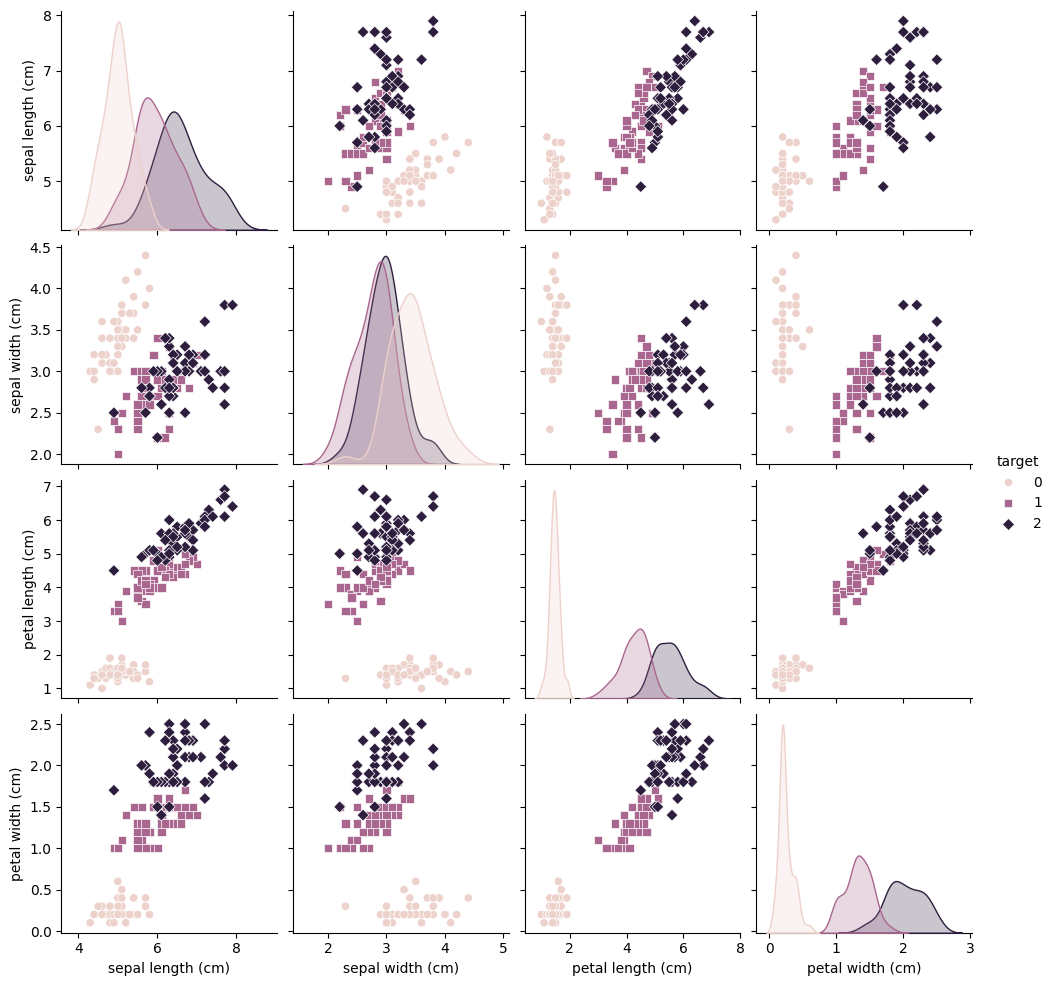

In [8]:
# Pair plot to visualize relationships between features
sns.pairplot(data, hue="target", markers=["o", "s", "D"])

Use correlation matrix to help you understand the linear relationships between features, which can be useful for feature selection and understanding multicollinearity.

Text(0.5, 1.0, 'Correlation Matrix of Iris Dataset')

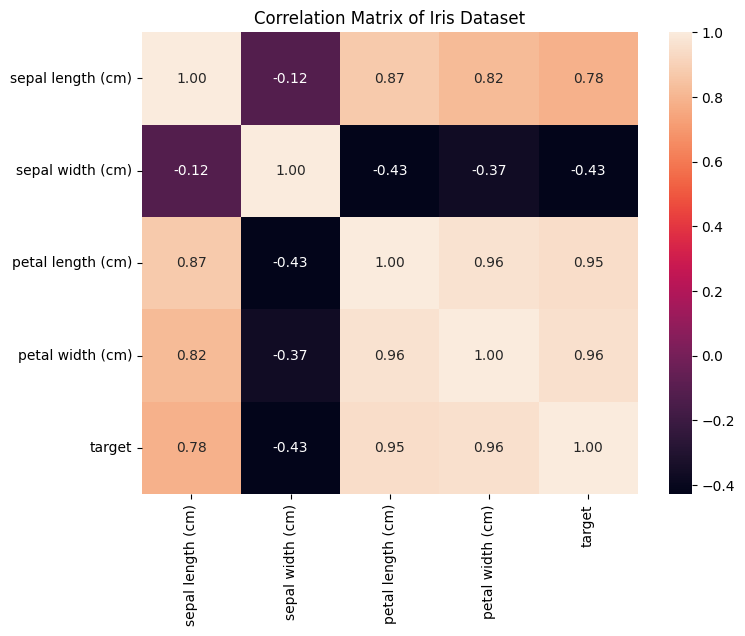

In [9]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix of Iris Dataset")

Visualizing the distribution of each feature and identifying potential outliers.

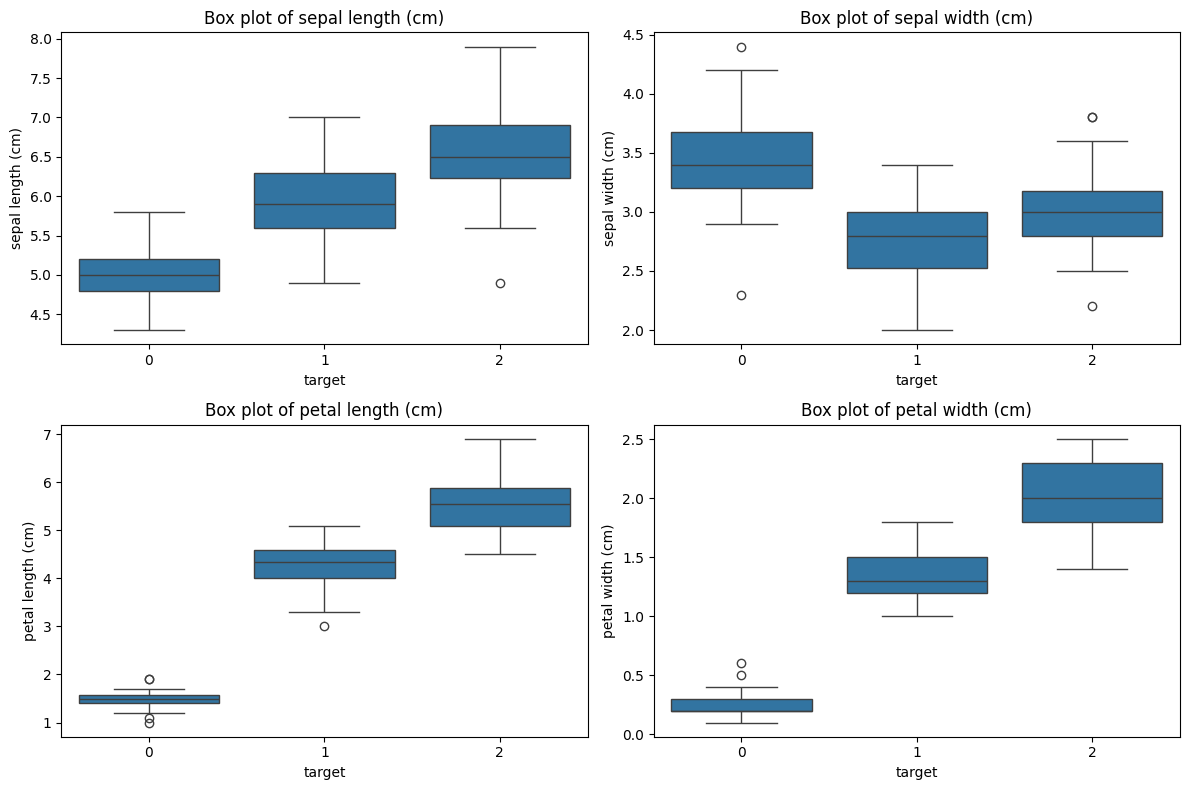

In [10]:
# Box plots to visualize the distribution of features and potential outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="target", y=column, data=data)
    plt.title(f"Box plot of {column}")
plt.tight_layout()
plt.show()

Only a small number of outliers observed, we can probably skip handling the outliers first.

Also take a look at how pairs of features separate the different classes.

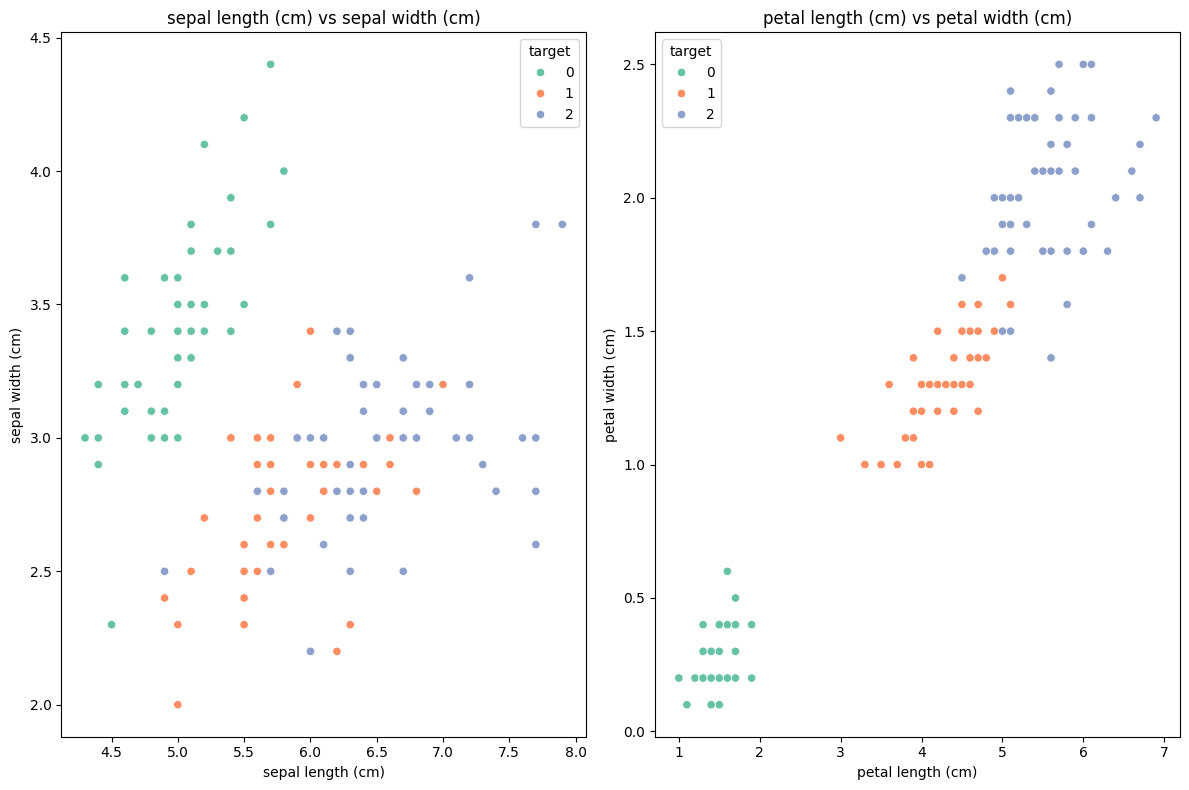

In [11]:
# Scatter plots for pairwise feature comparison
plt.figure(figsize=(12, 8))
for i, (x_feature, y_feature) in enumerate(
    [
        ("sepal length (cm)", "sepal width (cm)"),
        ("petal length (cm)", "petal width (cm)"),
    ],
    1,
):
    plt.subplot(1, 2, i)
    sns.scatterplot(x=x_feature, y=y_feature, hue="target", data=data, palette="Set2")
    plt.title(f"{x_feature} vs {y_feature}")
plt.tight_layout()
plt.show()

## 3. Data Pre-processsing / Cleaning

For this Iris dataset, the features are already on a similar scale, so standardization is not strictly necessary. But you can still experiment this step with the code provided below on the features.

However, we will skip this process for now and went straight to training the model.

In [12]:
# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=["target"]))

# Convert scaled features back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=data.columns[:-1])

### 4. Training the Model

#### Finding the optimal "K"

Since we know that Iris dataset has 3 classes, we can choose the number of clusters, k=3, to train the model. However, in real practice we use the elbow method to decide the optimum number of clusters. So, we will demonstrate the elbow method in the following:

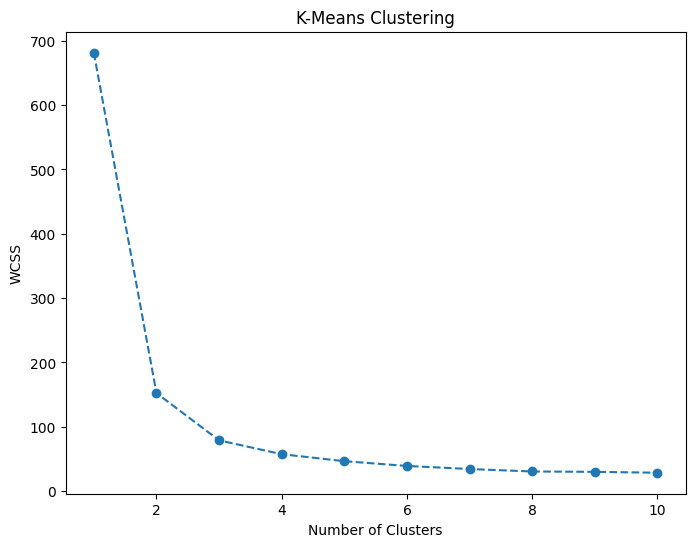

In [13]:
wcss = []

# Drop the target column for clustering
data = data.drop(columns=["target"])

# Determine the optimal number of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-Means Clustering")
plt.show()

From the graph above, we see the elbow occurs at k=3, so we can choose it as our number of clusters to train.

Alternatively, we can use the `yellowbrick` library to find out the optimal k value also.

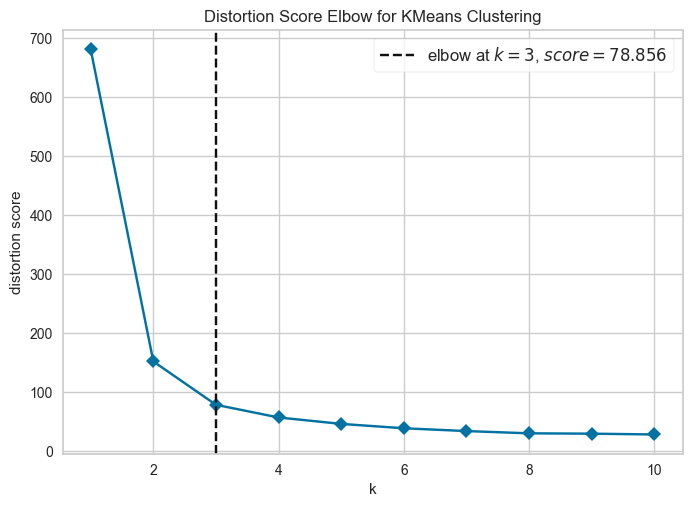

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(1, 11), timings=False)

# Fit the data and visualize
visualizer.fit(data)
visualizer.poof()

Yellowbrick confirms the optimal k=3.

#### Training with the optimal "K"

In [15]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)
pred_y = kmeans.predict(data)

In [16]:
# Combine the predictions with the original data
pred_data = pd.DataFrame(data, columns=data.columns)
pred_data["KMeans_Cluster"] = pred_y

In [17]:
pred_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),KMeans_Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [18]:
kmeans.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

Let's compare the K-means assigned cluster with the true label clusters.

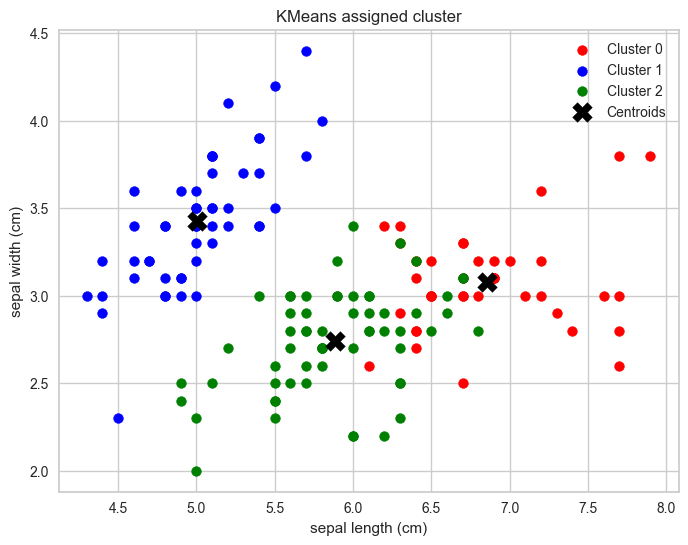

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(data.iloc[pred_y == 0, 0], data.iloc[pred_y == 0, 1], s=50, c="red", label="Cluster 0")
plt.scatter(data.iloc[pred_y == 1, 0], data.iloc[pred_y == 1, 1], s=50, c="blue", label="Cluster 1")
plt.scatter(data.iloc[pred_y == 2, 0], data.iloc[pred_y == 2, 1], s=50, c="green", label="Cluster 2")

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    marker="X",
    c="black",
    label="Centroids",
)

plt.title("KMeans assigned cluster")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

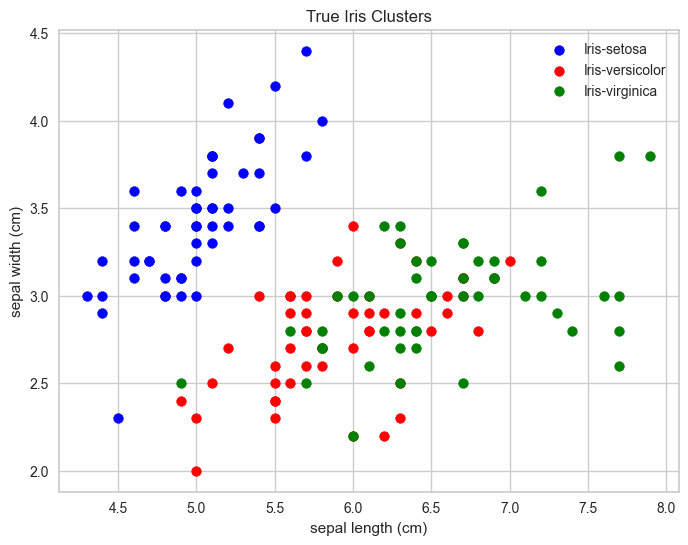

In [20]:
# Actual labels are in iris.target
y = iris.target

plt.figure(figsize=(8, 6))

# True clusters
plt.scatter(data.values[y == 0, 0], data.values[y == 0, 1], s=50, c="blue", label="Iris-setosa")
plt.scatter(data.values[y == 1, 0], data.values[y == 1, 1], s=50, c="red", label="Iris-versicolor")
plt.scatter(data.values[y == 2, 0], data.values[y == 2, 1], s=50, c="green", label="Iris-virginica")

plt.title("True Iris Clusters")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

##### Visualize in 3D!

In [21]:
import plotly.express as px

fig = px.scatter_3d(
    pred_data,
    x="sepal length (cm)",
    y="sepal width (cm)",
    z="petal length (cm)",
    color="KMeans_Cluster",
)
fig.show()

##### Predict new data

In [22]:
import numpy as np
# New data to predict
new_data = np.array([[5.1, 3.5, 1.4, 0.2],  # Example new data points
                     [6.7, 3.0, 5.2, 2.3]])

# Predict the cluster for the new data
predicted_clusters = kmeans.predict(new_data)

print("Predicted clusters for the new data:", predicted_clusters)

Predicted clusters for the new data: [1 0]
